In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup as BS
import re
import time
import matplotlib.pyplot as plt
import requests
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By


In [2]:
url = 'https://www.mykhel.com/cricket/most-runs-in-ipl-rs89/'
page = requests.get(url)
content = page.text

soup = BS(content, 'lxml')

In [24]:
driver = webdriver.Chrome()
driver.get('https://www.mykhel.com/cricket/most-runs-in-ipl-rs89/')

In [20]:
players = driver.find_elements("tag name", 'tr')

In [34]:

output_count = 0
data = ''
max_outputs = 10


for i in players:
    data += i.text

    #output_count += 1
    
    # Check if the desired number of outputs is reached
    #if output_count >= max_outputs:
        #break    

In [43]:
print(data)

# Player Runs 4s 6s Mat Inn HS 100s 50s Avg SR1
Virat Kohli
RCB
7924 699 267 250 242 113 8 55 38.65 131.802
Shikhar Dhawan
PBKS
6769 768 152 222 221 106* 2 51 35.26 127.143
David Warner
DC
6565 663 236 184 184 126 4 61 40.52 139.774
Rohit Sharma
MI
6560 589 277 256 251 109* 2 42 29.55 130.785
Suresh Raina
CSK
5528 506 203 205 200 100* 1 39 32.52 136.766
MS Dhoni
CSK
5218 360 251 263 228 84* 0 24 39.23 137.357
AB de Villiers
RCB
5162 413 251 184 170 133* 3 40 39.70 151.688
Chris Gayle
PBKS
4965 405 357 142 141 175* 6 31 39.72 148.969
Robin Uthappa
CSK
4952 481 182 205 197 88 0 27 27.51 130.3510
Dinesh Karthik
RCB
4817 464 160 255 232 97* 0 22 26.47 135.3911
KL Rahul
LSG
4628 397 184 131 122 132* 4 36 45.37 134.6112
Ajinkya Rahane
CSK
4609 475 102 184 170 105* 2 30 30.12 123.2713
Faf du Plessis
RCB
4500 416 162 143 136 96 0 36 36.00 136.4014
Sanju Samson
RR
4392 351 205 165 161 119 3 25 30.93 139.1615
Ambati Rayudu
CSK
4348 359 173 204 187 100* 1 22 28.23 127.5416
Gautam Gambhir
DC
4217 

In [36]:

# Split the string by line breaks to get individual player info
player_info_list = data.strip().split('\n')

# Remove the first line containing headers
player_info_list = player_info_list[1:]

# Create lists to store player, team, and stats
players = []
teams = []
stats = []

# Populate lists
for i in range(0, len(player_info_list), 12):  # Each player has 12 lines of info
    try:
        player_data = player_info_list[i:i+12]
        player_name = player_data[0]
        team_name = player_data[1]
        player_stats = player_data[2].split()
        players.append(player_name)
        teams.append(team_name)
        stats.append(player_stats)
    except IndexError:
        print("Incomplete player information or extra line at the end.")

# Create a DataFrame
df = pd.DataFrame(stats, columns=['Runs', '4s', '6s', 'Mat', 'Inn', 'HS', '100s', '50s', 'Avg', 'SR'], index=players)
df.index.name = 'Player'
df['Team'] = teams
df = df.reset_index()
df = df.loc[:, :'Avg']

# Display the DataFrame
print(df)

                   Player  Runs   4s   6s  Mat  Inn    HS 100s 50s    Avg
0             Virat Kohli  7924  699  267  250  242   113    8  55  38.65
1            Suresh Raina  5528  506  203  205  200  100*    1  39  32.52
2           Robin Uthappa  4952  481  182  205  197    88    0  27  27.51
3          Faf du Plessis  4500  416  162  143  136    96    0  36  36.00
4            Shane Watson  3874  376  190  145  141  117*    4  21  30.99
5          Kieron Pollard  3412  218  223  189  171   87*    0  16  28.67
6         Quinton de Kock  3157  316  123  107  107  140*    2  23  31.26
7         Ravindra Jadeja  2917  212  104  239  183   62*    0   3  27.01
8            Yuvraj Singh  2750  217  149  132  126    83    0  13  24.77
9            Ishan Kishan  2630  254  119  104   98    99    0  16  28.59
10          Andre Russell  2484  170  209  124  105   88*    0  11  29.22
11        Ruturaj Gaikwad  2380  217   91   65   64  108*    2  18  42.50
12         Rahul Tripathi  2102  206  

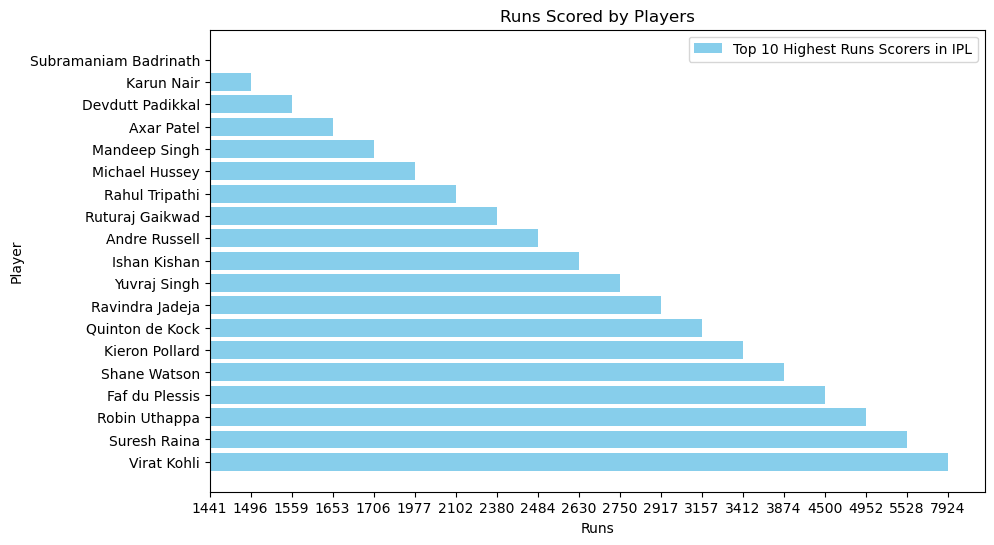

In [37]:
# Sort the dataframe by Runs in descending order
df_sorted = df.sort_values(by='Runs', ascending=True)



# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Player'], df_sorted['Runs'], color='skyblue')
plt.xlabel('Runs')
plt.ylabel('Player')
plt.title('Runs Scored by Players')
plt.gca().invert_yaxis()  # Invert y-axis to display highest runs at the top
plt.legend(['Top 10 Highest Runs Scorers in IPL'], loc='upper right')  # Add legend
plt.show()

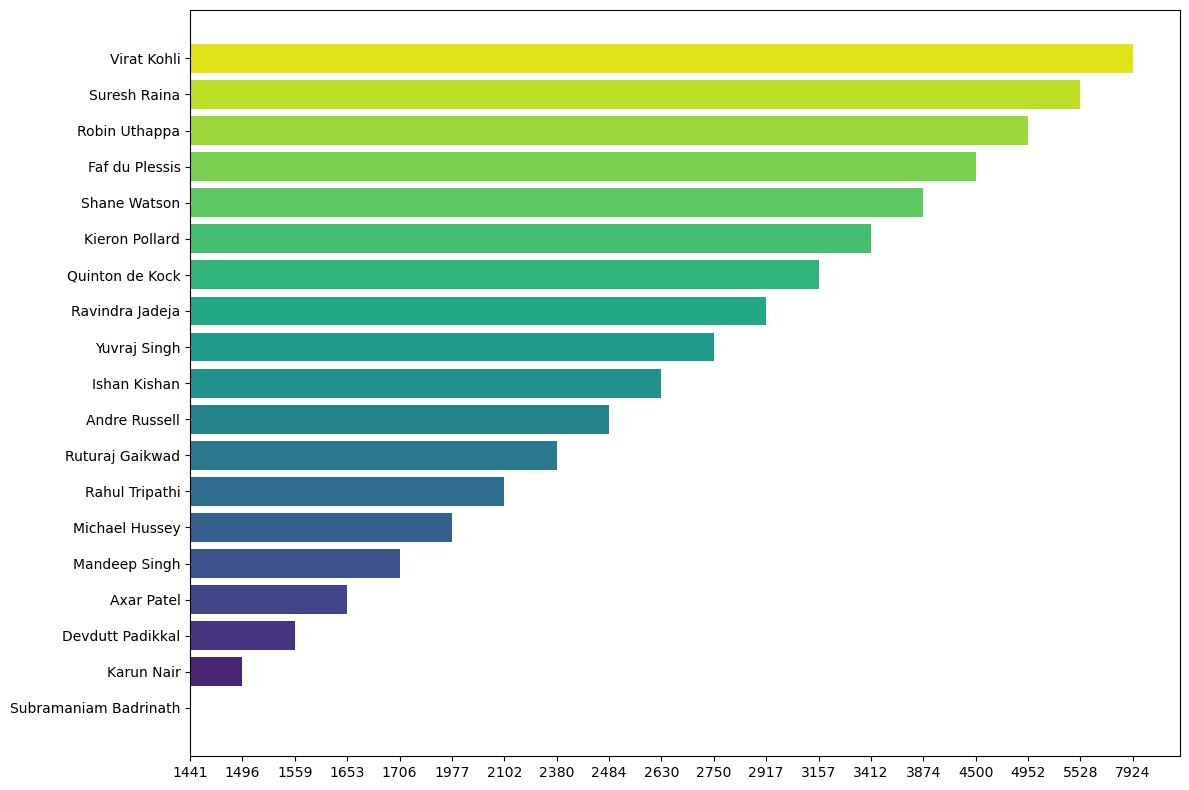

In [38]:
plt.figure(figsize=(12, 8))  # Increase figure size
colors = sns.color_palette("viridis", len(df_sorted))

# Plot the horizontal bar chart with custom colors
bars = plt.barh(df_sorted['Player'], df_sorted['Runs'], color=colors)

# Adjust spacing between bars
plt.tight_layout()

plt.show()

In [23]:
click = driver.find_element("xpath", '//*[@id="cat-list-wrap"]/div[2]/section/div/section/div/div[2]/ul/li[2]/a')
click.click()

ElementClickInterceptedException: Message: element click intercepted: Element <a href="/cricket/most-hundreds-in-ipl-rs90/">...</a> is not clickable at point (872, 638). Other element would receive the click: <iframe name="IL_SR_FRAME6" class="IL_BASE" src="javascript:window[&quot;$iceContent&quot;]" width="728" height="90" frameborder="0" scrolling="no" sandbox="allow-forms allow-scripts allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation" data-hookid="d_IL_INSEARCH"></iframe>
  (Session info: chrome=124.0.6367.208)
Stacktrace:
0   chromedriver                        0x0000000104cfe940 chromedriver + 4368704
1   chromedriver                        0x0000000104cf6dd4 chromedriver + 4337108
2   chromedriver                        0x000000010491ac04 chromedriver + 289796
3   chromedriver                        0x000000010496288c chromedriver + 583820
4   chromedriver                        0x0000000104960e20 chromedriver + 577056
5   chromedriver                        0x000000010495efac chromedriver + 569260
6   chromedriver                        0x000000010495e13c chromedriver + 565564
7   chromedriver                        0x0000000104953940 chromedriver + 522560
8   chromedriver                        0x0000000104953368 chromedriver + 521064
9   chromedriver                        0x00000001049955ec chromedriver + 792044
10  chromedriver                        0x0000000104951ab4 chromedriver + 514740
11  chromedriver                        0x000000010495250c chromedriver + 517388
12  chromedriver                        0x0000000104cc2e5c chromedriver + 4124252
13  chromedriver                        0x0000000104cc7c4c chromedriver + 4144204
14  chromedriver                        0x0000000104ca8824 chromedriver + 4016164
15  chromedriver                        0x0000000104cc857c chromedriver + 4146556
16  chromedriver                        0x0000000104c9a2d8 chromedriver + 3957464
17  chromedriver                        0x0000000104ce7ec4 chromedriver + 4275908
18  chromedriver                        0x0000000104ce8040 chromedriver + 4276288
19  chromedriver                        0x0000000104cf6a34 chromedriver + 4336180
20  libsystem_pthread.dylib             0x0000000184e67034 _pthread_start + 136
21  libsystem_pthread.dylib             0x0000000184e61e3c thread_start + 8


In [40]:
hundreds = driver.find_elements("tag name", 'tr')
Data = ''


for i in hundreds:
    
    Data += i.text
    

In [41]:
print(Data)

# Player Mat Inn 100s 50s Runs HS1
Virat Kohli
250 242 8 55 7,924 113*2
Jos Buttler
107 106 7 19 3,582 1243
Chris Gayle
142 141 6 31 4,965 175*4
Lokesh Rahul
131 122 4 36 4,628 132*5
David Warner
184 184 4 62 6,565 1266
Shubman Gill
103 100 4 20 3,216 1297
Shane Watson
145 141 4 21 3,874 117*8
AB de Villiers
184 170 3 40 5,162 133*9
Sanju Samson
165 161 3 25 4,392 11910
Hashim Amla
16 16 2 3 577 104*11
Ruturaj Gaikwad
65 64 2 18 2,380 108*12
Shikhar Dhawan
222 221 2 51 6,769 106*13
Jonny Bairstow
50 50 2 9 1,589 11414
Suryakumar Yadav
149 134 2 24 3,594 103*15
YBK Jaiswal
50 50 2 9 1,520 12416
Quinton de Kock
107 107 2 23 3,157 140*17
Ajinkya Rahane
184 170 2 30 4,609 105*18
Rohit Sharma
256 251 2 42 6,560 109*19
Brendon McCullum
109 109 2 13 2,880 158*20
Virender Sehwag
104 104 2 16 2,728 12221
Adam Gilchrist
80 80 2 11 2,069 109*22
Murali Vijay
106 106 2 13 2,619 12723
Ben Stokes
45 44 2 2 935 107*


In [55]:
# Regular expression patterns for extracting data
pattern = re.compile(r'([A-Za-z ]+)\n(\d+)\s(\d+)\s(\d+)\s(\d+)\s([\d,]+)\s([\d*]+)')

# Extracting data
matches = pattern.findall(Data)

# Cleaning and formatting data
cleaned_data = []
for match in matches:
    name = match[0].strip()
    mat = int(match[1])
    inn = int(match[2])
    hundreds = int(match[3])
    fifties = int(match[4])
    runs = int(match[5].replace(',', ''))
    hs = int(match[6].replace('*', ''))
    cleaned_data.append([name, mat, inn, hundreds, fifties, runs, hs])

# Creating DataFrame
columns = ['Player', 'Mat', 'Inn', '100s', '50s', 'Runs', 'HS']
dff = pd.DataFrame(cleaned_data, columns=columns)

# Displaying DataFrame
print(dff)

              Player  Mat  Inn  100s  50s  Runs     HS
0        Virat Kohli  250  242     8   55  7924   1132
1        Jos Buttler  107  106     7   19  3582   1243
2        Chris Gayle  142  141     6   31  4965   1754
3       Lokesh Rahul  131  122     4   36  4628   1325
4       David Warner  184  184     4   62  6565   1266
5       Shubman Gill  103  100     4   20  3216   1297
6       Shane Watson  145  141     4   21  3874   1178
7     AB de Villiers  184  170     3   40  5162   1339
8       Sanju Samson  165  161     3   25  4392  11910
9        Hashim Amla   16   16     2    3   577  10411
10   Ruturaj Gaikwad   65   64     2   18  2380  10812
11    Shikhar Dhawan  222  221     2   51  6769  10613
12    Jonny Bairstow   50   50     2    9  1589  11414
13  Suryakumar Yadav  149  134     2   24  3594  10315
14       YBK Jaiswal   50   50     2    9  1520  12416
15   Quinton de Kock  107  107     2   23  3157  14017
16    Ajinkya Rahane  184  170     2   30  4609  10518
17      Ro

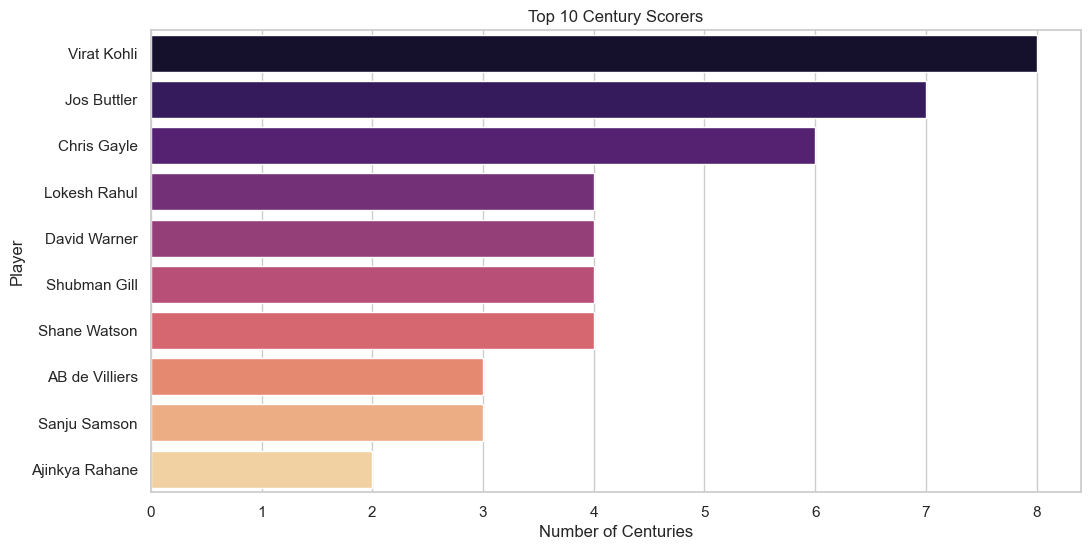

In [56]:
# Selecting top 10 century scorers
top_10_century_scorers = dff.sort_values(by='100s', ascending=False).head(10)

# Visualization: Top 10 Century Scorers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_century_scorers, x='100s', y='Player', palette='magma')
plt.title('Top 10 Century Scorers')
plt.xlabel('Number of Centuries')
plt.ylabel('Player')
plt.show()



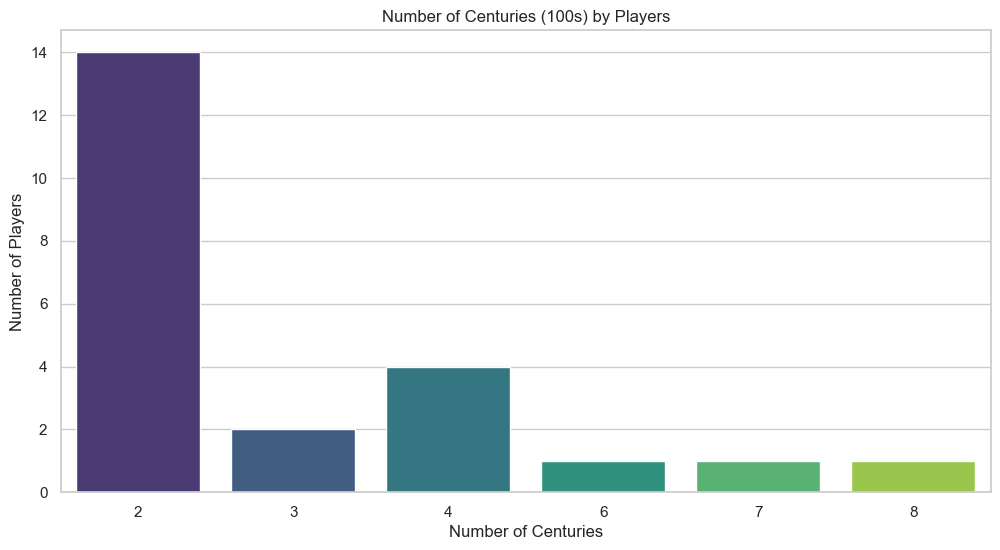

In [53]:
# Visualization 2: Number of Centuries (100s) by Players
plt.figure(figsize=(12, 6))
sns.countplot(data=dff, x='100s', palette='viridis')
plt.title('Number of Centuries (100s) by Players')
plt.xlabel('Number of Centuries')
plt.ylabel('Number of Players')
plt.show()

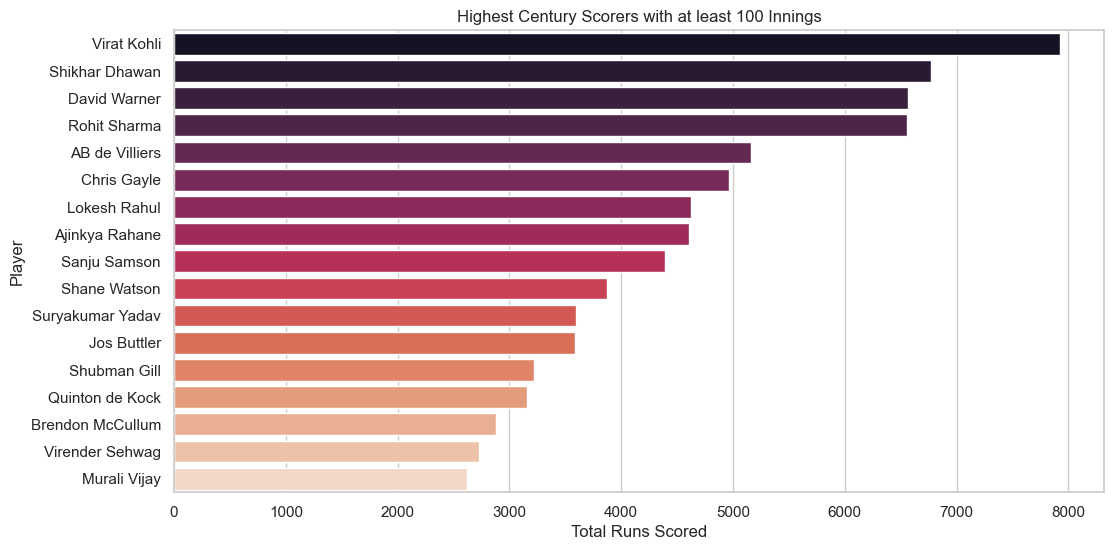

In [60]:
# Filtering players with at least 250 innings
at_least_250_innings = dff[dff['Inn'] >= 100]

# Sorting players by total runs scored
best_scorers = at_least_250_innings.sort_values(by='Runs', ascending=False)

# Visualization: Best Scorers with at least 250 innings
plt.figure(figsize=(12, 6))
sns.barplot(data=best_scorers, x='Runs', y='Player', palette='rocket')
plt.title('Highest Century Scorers with at least 100 Innings')
plt.xlabel('Total Runs Scored')
plt.ylabel('Player')
plt.show()


In [4]:

click = driver.find_element("xpath", '//*[@id="cat-list-wrap"]/div[2]/section/div/section/div/div[2]/ul/li[4]/a')
click.click()

In [6]:
ducks = driver.find_elements("tag name", 'tr')
ducks_data = ''


for i in ducks:
    
    ducks_data += i.text

In [8]:
# Regular expression patterns for extracting data
pattern = re.compile(r'([A-Za-z ]+)\n(\d+)\s(\d+)\s(\d+)\s(\d+)\s([\d,]+)\s([\d*]+)')

# Extracting data
matches = pattern.findall(ducks_data)

# Cleaning and formatting data
cleaned_data = []
for match in matches:
    name = match[0].strip()
    mat = int(match[1])
    inn = int(match[2])
    hundreds = int(match[3])
    fifties = int(match[4])
    runs = int(match[5].replace(',', ''))
    hs = int(match[6].replace('*', ''))
    cleaned_data.append([name, mat, inn, hundreds, fifties, runs, hs])

# Creating DataFrame
columns = ['Player', 'Mat', 'Inn', '100s', '50s', 'Runs', 'HS']
dfff = pd.DataFrame(cleaned_data, columns=columns)

# Displaying DataFrame
print(dfff)

            Player  Mat  Inn  100s  50s  Runs   HS
0   Dinesh Karthik  255  232    18    0    22    4
1    Glenn Maxwell  132  127    17    0    18    2
2     Rohit Sharma  256  251    17    2    42    6
3    Piyush Chawla  191   92    16    0     0  624
4     Sunil Narine  174  108    16    1     7    1
..             ...  ...  ...   ...  ...   ...  ...
70    Ashish Nehra   88   22     5    0     0   41
71    Morne Morkel   70   23     5    0     0  126
72         AP Tare   35   28     5    0     1  339
73  Jasprit Bumrah  133   30     5    0     0   68
74        RP Singh   82   30     5    0     0   52

[75 rows x 7 columns]


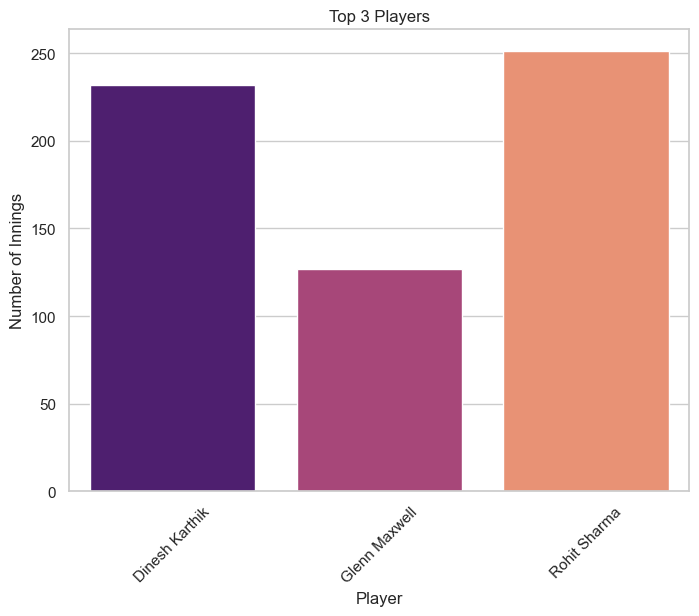

In [18]:
# Selecting the first three players from the DataFrame
top_3_players = dfff.head(3)

# Visualization: Top 3 Players
plt.figure(figsize=(8, 6))
sns.barplot(data=top_3_players, x='Player', y='Inn', palette='magma')
plt.title('Top 3 Players')
plt.xlabel('Player')
plt.ylabel('Number of Innings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Data Collection
- **Website**: I chose mykhel.com for data collection as it provided tabular data from multiple web pages related to IPL players' statistics.
- **Method**: Utilized Selenium and Chrome driver to access web pages and extract elements.
- **Process**: Used Selenium's click function to navigate through different links and scrape data from three different web pages.

### Web Crawling
- **Approach**: Employed Selenium for web crawling to access various links and gather extensive data.
- **Implementation**: Used Selenium's click function to access different pages and extract new data.
- **Pages Crawled**: Successfully navigated through three different web pages to collect relevant information.

### Web Scraping
- **Tools Used**: Selenium and Chrome driver were utilized for web scraping, while Requests and BeautifulSoup were employed to ensure webpage accessibility.
- **Data Scraped**: Extracted more than 300 rows of data from a total of three different web pages.
- **Methods**: Used find_elements with XPath to scrape desired tables and text data.

### Data Cleaning
- **Approach**: Utilized the `re` module and `for` loops for data cleaning and transformation.
- **Data Frame**: Cleaned data were added to a pandas DataFrame for further analysis.

### Analysis
- **Tools Used**: Utilized Pandas and Seaborn for data analysis.
- **Visualizations**: Created visualizations such as top highest run scorers and top players with most ducks using Seaborn.



